### Import Librabries

In [21]:
# import required package for data handling
import pandas as pd
import numpy as np

# import required packages for splitting data
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import required packages for evaluating models
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
from sklearn.linear_model import LogisticRegression

import seaborn as sns
import matplotlib.pyplot as plt

### Load the source data

In [22]:
# Create dataframe and fill missing values
df = pd.read_csv('Competition1_raw_data.csv', header=0, na_values=['-'])
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [23]:
df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


### Analyze the Source Data

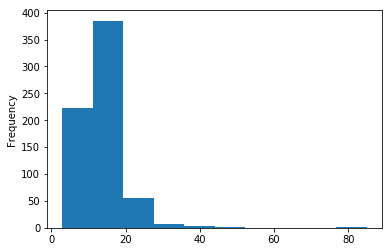

In [24]:
df['P(IPO)'].plot.hist()

### Data Cleaning

In [25]:
# Calculating the number of nulls in each column.
# df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [26]:
# Add Positive EPS dummy column C3_D with dummy variable set to 1 if C3 is positive, otherwise 0. 
df['C3_D'] = pd.get_dummies(df.C3 > 0, drop_first=True, dtype=bool)

# Add Share Overhang column C5_D.
df['C5_D']=df['C5']/df['C6']

# Add Up Revision column C6_D.
df['P(mid)'] = ((df['P(H)']+df['P(L)'])/2)
df['C6_D'] = ((df['P(IPO)']-df['P(mid)'])/df['P(mid)']*0.01).where((df['P(IPO)'] > df['P(mid)']), 0)

In [27]:
# Create column T1_D with Percent of long sentences
df['T1_D']=df['T4']/df['T1']
# Create column T3_D with Percent of real words
df['T3_D']=df['T3']/df['T2']
# Create column T5_D with Percent of long words
df['T5_D']=df['T5']/df['T2']
# Create column S1_D with Percent of Positive words
df['S1_D']=df['S1']/df['T2']
# Create column S2_D with Percent of real words
df['S2_D']=df['S2']/df['T2']
# Create column S3_D with Percent of real words
df['S3_D']=df['S3']/df['T2']

##### Adding Target Variables

In [28]:
# Add Pre-IPO Price Revision column Y1.
df['Y1'] = np.where(df['P(IPO)'] < ((df['P(H)'] + df['P(L)'])/2), '1', '0')
df['Y1'] = df['Y1'].astype('int')

#Add Post-IPO Initial Return column Y2.
df['Y2'] = np.where(df['P(IPO)'] < df['P(1Day)'], '1', '0')
df['Y2'] = df['Y2'].astype('int')

#df.info()
#df.head(5)

In [29]:
# Change the data types 
df['Y1'] = df['Y1'].astype('bool')
df['Y2'] = df['Y2'].astype('bool')
df['C2'] = df['C2'].astype('bool')
#df.info()

In [30]:
# Drop columns and view head
df.drop(['P(IPO)', 'P(H)', 'P(L)', 'P(1Day)', 'P(mid)', 'C3', 'C5', 'C6', 'T1', 'T2', 'T3', 'T4', 'T5', 'S1', 'S2', 'S3'], axis=1, inplace=True)
df.head()

,I1,I2,I3,C1,C2,C4,C7,C3_D,C5_D,C6_D,T1_D,T3_D,T5_D,S1_D,S2_D,S3_D,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,122.0,True,0.029074,51.345,True,3.864345,0.001111,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929,False,True
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,259.0,False,-0.013352,25.936,False,12.028832,0.000000,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876,True,False
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,90.0,True,0.020715,7.378,False,3.369134,0.000000,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403,True,False
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,209.0,True,0.020023,8.526,False,3.299697,0.000000,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319,True,True
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,80.0,True,-0.034895,632.298,True,3.726269,0.000500,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261,False,True


Check the shape of the data.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 18 columns):
I1      682 non-null object
I2      682 non-null object
I3      674 non-null object
C1      660 non-null float64
C2      682 non-null bool
C4      660 non-null float64
C7      610 non-null float64
C3_D    682 non-null bool
C5_D    676 non-null float64
C6_D    682 non-null float64
T1_D    681 non-null float64
T3_D    679 non-null float64
T5_D    679 non-null float64
S1_D    679 non-null float64
S2_D    679 non-null float64
S3_D    679 non-null float64
Y1      682 non-null bool
Y2      682 non-null bool
dtypes: bool(4), float64(11), object(3)
memory usage: 77.3+ KB


#### Imputation

In [32]:
pd.options.mode.use_inf_as_na = True

In [33]:
# Replace the missing data with mean/median/mode
#df[df.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

df['C1'].fillna(df['C1'].median(), inplace = True)
df['I3'].fillna(df['I3'].mode(), inplace = True)
df['C2'].fillna(df['C2'].median(), inplace = True)
df['C4'].fillna(df['C4'].median(), inplace = True)
df['C7'].fillna(df['C7'].median(), inplace = True)
df['C5_D'].fillna(df['C5_D'].median(), inplace = True)
df['T1_D'].fillna(df['T1_D'].median(), inplace = True)
df['T3_D'].fillna(df['T3_D'].median(), inplace = True)
df['T5_D'].fillna(df['T5_D'].median(), inplace = True)
df['S1_D'].fillna(df['S1_D'].median(), inplace = True)
df['S2_D'].fillna(df['S2_D'].median(), inplace = True)
df['S3_D'].fillna(df['S3_D'].median(), inplace = True)
df.isnull().sum()
print(df.describe(include= 'float64'))

                C1          C4            C7        C5_D        C6_D  \
count   682.000000  682.000000    682.000000  682.000000  682.000000   
mean    148.350440    0.007342    458.587321    4.625759    0.000523   
std     150.518513    0.032777   1563.531760    6.245823    0.001074   
min      10.000000   -0.162352      0.074000    0.283223    0.000000   
25%      85.000000   -0.013352     41.511500    2.853439    0.000000   
50%     107.000000    0.009125    103.833000    3.753607    0.000000   
75%     152.750000    0.030941    289.758000    4.865080    0.000714   
max    2087.000000    0.092896  30683.000000   99.787255    0.010000   

             T1_D        T3_D        T5_D        S1_D        S2_D        S3_D  
count  682.000000  682.000000  682.000000  682.000000  682.000000  682.000000  
mean     0.628062    0.913839    0.080496    0.005488    0.009151    0.011833  
std      0.083532    0.626453    0.744773    0.004787    0.004299    0.008962  
min      0.000000    0.000000  

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 18 columns):
I1      682 non-null object
I2      682 non-null object
I3      674 non-null object
C1      682 non-null float64
C2      682 non-null bool
C4      682 non-null float64
C7      682 non-null float64
C3_D    682 non-null bool
C5_D    682 non-null float64
C6_D    682 non-null float64
T1_D    682 non-null float64
T3_D    682 non-null float64
T5_D    682 non-null float64
S1_D    682 non-null float64
S2_D    682 non-null float64
S3_D    682 non-null float64
Y1      682 non-null bool
Y2      682 non-null bool
dtypes: bool(4), float64(11), object(3)
memory usage: 77.3+ KB


In [35]:
df_I3 = df['I3'].fillna(' ')
df_I3 = df.I3
#df_I3 = df_I3.astype('str')
# check the value in column contains ',', if so then replace the whole value as '0'
df_I3[df.I3.str.contains(",")] = '0'
df_I3[df.I3.str.contains(" ")] = '0'
# You should change the dtype back to 'float' or 'int' to match the original data
# if the original dtype is object then do NOT do this!!!
#df_I3 = df_I3.astype('float')
# look at the first 5 values to see if they are changed
df_I3.head(12)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


ValueError: cannot index with vector containing NA / NaN values

In [ ]:
df.info()

#### Normalization

In [ ]:
#review all columns to later identify needed ones for normalization based on data dictionary and data type
print(df.columns)
cols= df.columns

In [39]:
# checking the continuous columns/float64 that needs to be normalized 
print(df.describe(include= 'float64'))

# Creating new variable (cf) for continuous datatype
cf= df.select_dtypes(include=['float64'])

                C1          C4            C7        C5_D        C6_D  \
count   682.000000  682.000000    682.000000  682.000000  682.000000   
mean    148.350440    0.007342    458.587321    4.625759    0.000523   
std     150.518513    0.032777   1563.531760    6.245823    0.001074   
min      10.000000   -0.162352      0.074000    0.283223    0.000000   
25%      85.000000   -0.013352     41.511500    2.853439    0.000000   
50%     107.000000    0.009125    103.833000    3.753607    0.000000   
75%     152.750000    0.030941    289.758000    4.865080    0.000714   
max    2087.000000    0.092896  30683.000000   99.787255    0.010000   

             T1_D        T3_D        T5_D        S1_D        S2_D        S3_D  
count  682.000000  682.000000  682.000000  682.000000  682.000000  682.000000  
mean     0.628062    0.913839    0.080496    0.005488    0.009151    0.011833  
std      0.083532    0.626453    0.744773    0.004787    0.004299    0.008962  
min      0.000000    0.000000  

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#x = cf.values #returns a numpy array
scaler= MinMaxScaler()
scaler.fit_transform(cf)

array([[5.39239287e-02, 7.49962414e-01, 1.67099448e-03, ...,
        4.08729848e-02, 7.92361573e-02, 2.54230680e-02],
       [1.19884449e-01, 5.83747768e-01, 8.42879196e-04, ...,
        2.75721222e-02, 1.00670704e-01, 2.51909695e-02],
       [3.85170920e-02, 7.17212778e-01, 2.38047701e-04, ...,
        9.61488459e-02, 4.63171845e-02, 2.74994403e-02],
       ...,
       [4.91092922e-02, 7.55255452e-01, 1.80416301e-03, ...,
        3.52484773e-02, 7.74926209e-02, 2.10316883e-02],
       [3.27395282e-02, 7.62538533e-01, 3.83871473e-03, ...,
        5.64929057e-02, 3.60905122e-02, 3.93617857e-02],
       [1.30476649e-01, 7.32775505e-01, 4.78930856e-02, ...,
        6.70971325e-02, 7.51293248e-02, 3.69096935e-02]])

#### Standardization

In [41]:
#Standardization
import scipy
scipy.stats.zscore(cf, axis=0, ddof=0)

array([[-0.17519293,  0.66353865, -0.26065426, ..., -0.12825638,
         0.01104092, -0.10095086],
       [ 0.73566214, -0.63180489, -0.27691722, ..., -0.4661801 ,
         0.45473085, -0.10686693],
       [-0.3879474 ,  0.40831427, -0.28879521, ...,  1.27609051,
        -0.67037386, -0.04802519],
       ...,
       [-0.2416787 ,  0.70478834, -0.25803903, ..., -0.27115346,
        -0.02504986, -0.21288489],
       [-0.46773033,  0.76154682, -0.21808345, ...,  0.2685857 ,
        -0.88206351,  0.25433995],
       [ 0.88193083,  0.52959767,  0.64707908, ...,  0.53799829,
        -0.07396952,  0.19183737]])

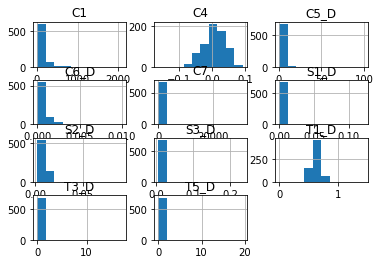

In [42]:
hist = cf.hist()

In [43]:
df['I3'] = df.I3.astype('float')

ValueError: could not convert string to float: '7389, 5063'

In [44]:
def assign_label(df_I3):
    if df_I3 > 100 and df_I3 < 4000:
        return 1
    elif df_I3 >= 4000 and df_I3 < 6000:
        return 2
    elif df_I3 >= 6000 and df_I3 < 10000:
        return 3
    else:
        return 4
      
df['I3'] = df['I3'].apply(assign_label)    
dummy_df = pd.get_dummies(df['I3'], prefix='Class')
df = pd.concat([df, dummy_df], axis=1)

df.head()

TypeError: '>' not supported between instances of 'str' and 'int'

In [45]:
df['I3'] = df.I3.astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 18 columns):
I1      682 non-null object
I2      682 non-null object
I3      682 non-null object
C1      682 non-null float64
C2      682 non-null bool
C4      682 non-null float64
C7      682 non-null float64
C3_D    682 non-null bool
C5_D    682 non-null float64
C6_D    682 non-null float64
T1_D    682 non-null float64
T3_D    682 non-null float64
T5_D    682 non-null float64
S1_D    682 non-null float64
S2_D    682 non-null float64
S3_D    682 non-null float64
Y1      682 non-null bool
Y2      682 non-null bool
dtypes: bool(4), float64(11), object(3)
memory usage: 77.3+ KB


#### Correlation Analysis

In [46]:
#Initial corrlation analysis using basic native function
df.corr()

,C1,C2,C4,C7,C3_D,C5_D,C6_D,T1_D,T3_D,T5_D,S1_D,S2_D,S3_D,Y1,Y2
C1,1.000000,-0.017937,0.034674,0.030425,0.062228,-0.002469,0.108395,-0.004499,-0.010446,-0.010373,-0.004215,0.038833,-0.009483,0.025759,0.000218
C2,-0.017937,1.000000,-0.050363,0.094346,0.019832,0.053722,0.059688,0.085243,0.012901,0.016495,0.043602,0.049096,0.023943,-0.071471,0.044402
C4,0.034674,-0.050363,1.000000,-0.004159,-0.024823,0.016682,0.079972,0.033791,0.006001,0.002519,-0.000942,0.015893,0.011564,-0.080126,0.078738
C7,0.030425,0.094346,-0.004159,1.000000,0.074986,0.078869,-0.037524,0.066154,-0.009713,-0.008852,0.028309,0.226402,-0.019628,-0.011619,0.028477
C3_D,0.062228,0.019832,-0.024823,0.074986,1.000000,0.007484,0.008857,0.004353,-0.042900,-0.038331,-0.015093,-0.088660,-0.070211,-0.087936,0.014523
C5_D,-0.002469,0.053722,0.016682,0.078869,0.007484,1.000000,0.030727,0.115747,-0.005573,-0.005771,-0.001754,-0.002666,-0.005620,-0.050697,0.001051
C6_D,0.108395,0.059688,0.079972,-0.037524,0.008857,0.030727,1.000000,0.003710,-0.015844,-0.018980,-0.042006,-0.064548,-0.019685,-0.488644,0.167047
T1_D,-0.004499,0.085243,0.033791,0.066154,0.004353,0.115747,0.003710,1.000000,0.361097,0.372905,0.360228,0.254321,0.328986,0.035702,-0.001038
T3_D,-0.010446,0.012901,0.006001,-0.009713,-0.042900,-0.005573,-0.015844,0.361097,1.000000,0.994942,0.927365,0.728346,0.946431,-0.035369,-0.056155
T5_D,-0.010373,0.016495,0.002519,-0.008852,-0.038331,-0.005771,-0.018980,0.372905,0.994942,1.000000,0.929542,0.731542,0.949302,-0.037262,-0.054934


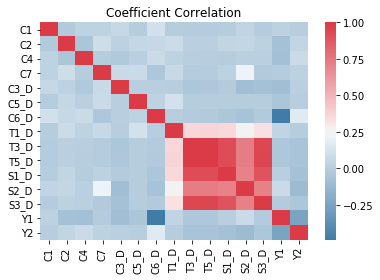

In [47]:
import seaborn as sns
correl = df.corr()
ax=plt.axes()
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(correl, xticklabels = correl.columns.values, yticklabels = correl.columns.values, cmap=cmap);
ax.set_title('Coefficient Correlation');

In [48]:
#c6_D is extremely un correlated with Y1, Dropping C6 from Dataframe
del df['C6_D']
df.head()

,I1,I2,I3,C1,C2,C4,C7,C3_D,C5_D,T1_D,T3_D,T5_D,S1_D,S2_D,S3_D,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,122.0,True,0.029074,51.345,True,3.864345,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929,False,True
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,259.0,False,-0.013352,25.936,False,12.028832,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876,True,False
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,90.0,True,0.020715,7.378,False,3.369134,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403,True,False
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,209.0,True,0.020023,8.526,False,3.299697,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319,True,True
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,80.0,True,-0.034895,632.298,True,3.726269,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261,False,True


In [49]:
df.corr('Y1','Y2')

KeyError: 'Y1'

In [50]:
cf.head()

,C1,C4,C7,C5_D,C6_D,T1_D,T3_D,T5_D,S1_D,S2_D,S3_D
0,122.0,0.029074,51.345,3.864345,0.001111,0.640426,0.908876,0.054250,0.004875,0.009199,0.010929
1,259.0,-0.013352,25.936,12.028832,0.000000,0.644753,0.898724,0.051395,0.003258,0.011105,0.010876
2,90.0,0.020715,7.378,3.369134,0.000000,0.636816,0.909350,0.061764,0.011593,0.006271,0.011403
3,209.0,0.020023,8.526,3.299697,0.000000,0.539634,0.917060,0.061630,0.009686,0.007144,0.013319
4,80.0,-0.034895,632.298,3.726269,0.000500,0.587413,0.888469,0.048550,0.004518,0.010047,0.011261


In [52]:
from sklearn.preprocessing import LabelEncoder

X= cf.values
Y= df['Y1'], ['Y2']

In [55]:
from sklearn.preprocessing import LabelEncoder
labelencoder= LabelEncoder()
df['Y2']= labelencoder.fit_transform(df['Y2'])

In [56]:
from sklearn import tree

tm = tree.DecisionTreeClassifier()
tm = tm.fit(X,Y)
#tree.score( X,Y)

ValueError: Unknown label type: 'unknown'

In [57]:
import graphviz 
tree_data = tree.export_graphviz(tm, out_file=None) 
see_tree = graphviz.Source(tree_data) 
see_tree.render("tm") 


tree_data = tree.export_graphviz(tm, out_file=None, 
                         feature_names=cf.feature_names,  
                         class_names=cf.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
see_tree = graphviz.Source(tree_data)  
see_tree


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.